# Correlation and clustering with Pandas

By [Allison Parrish](https://www.decontextualize.com/)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

But first, a little digression!

## Making up data

Sometimes it's useful to be able to make up some fake "toy" data, as a way of testing out different visualization techniques or statistical calculations that we're interested in. Finding the "perfect" dataset for experimenting with something can be kind of a drag. You could just type in a bunch of numbers, but why go to all that effort? That's what we have computers for, after all.

### Lines

So I'm going to show you a handful of functions in the `numpy` library (which we imported above) that make it easy to make up fake data. The first is `np.linspace()`, which generates an array of numbers across a range, evenly spaced. The first parameter is the beginning of the range, the second parameter is the end of the range (inclusive), and the final number is how many numbers to generate. For example, the following generates an array of numbers starting at 10, ending at 50, with 17 evenly-spaced elements:

In [2]:
np.linspace(10, 50, 17)

array([10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5, 30. , 32.5, 35. ,
       37.5, 40. , 42.5, 45. , 47.5, 50. ])

We can easily turn this into a Pandas series and draw a graph to see what it looks like:

<Axes: >

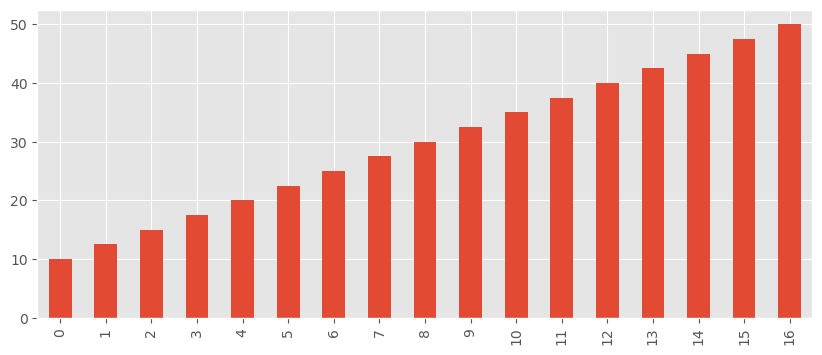

In [3]:
pd.Series(np.linspace(10, 50, 17)).plot.bar()

### Noise

Another helpful function is `np.random.uniform()`, which generates a sequence of random numbers (drawn from a uniform distribution). The first parameter to this function is the bottom of the range of random numbers, and the second is the top of the range. The `size` parameter specifies how many numbers we want. For example, the following cell gives us twenty-five random numbers between -10 and 10:

In [4]:
np.random.uniform(-10, 10, size=25)

array([-5.90736281, -9.71567398,  9.15083346, -5.62880999,  7.62551047,
        2.3064266 ,  1.94754784,  1.88023417,  0.69939609, -0.68291035,
       -1.65675312, -6.82421261,  8.39791431,  5.89168559,  6.46876198,
        8.71838307, -0.45231008,  9.92317873,  3.32899491, -0.68545617,
        5.39297569,  5.91665654,  3.17238783,  3.64167337, -7.13028274])

Plotted as a Pandas series:

<Axes: >

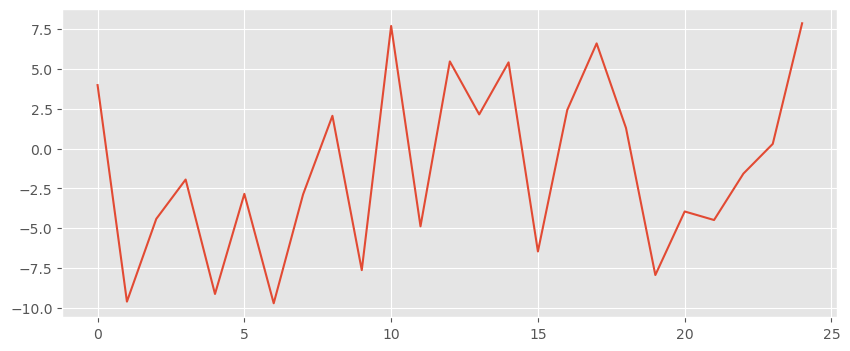

In [5]:
pd.Series(np.random.uniform(-10, 10, size=25)).plot()

Both `linspace` and `random` return `numpy` arrays, which you can use in mathematical expressions. In particular, adding two numpy arrays together results in the element-wise sum of the two arrays (but note that the arrays need to have the same length). Using this property, we can generate a sequence of numbers with `np.linspace()` and add a bit of "noise" to it with `np.random.uniform()`:

<Axes: >

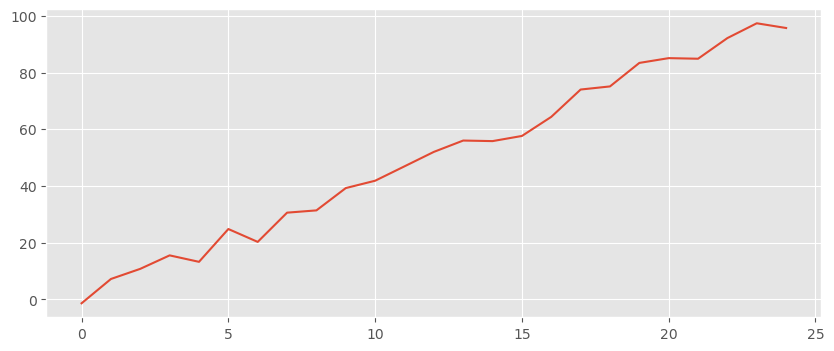

In [6]:
noisy_line = np.linspace(0, 100, 25) + np.random.uniform(-5, 5, size=25)
pd.Series(noisy_line).plot()

(Larger numbers in `np.random.uniform()` will increase the amount of "noise.")

### Periodic

We can create data that looks like it has repeating patterns with `np.sin()`. This function takes the sine of each value in the array that you pass as a parameter. Remember from your trigonometry class that $sin(0)$ is 0; $sin(\frac{\pi}{2})$ is 1; $sin(\pi)$ is 0 again; $sin(\frac{3}{2}\pi)$ is -1, and $sin(2\pi)$ is zero again, and those points are connected with a pleasant curvy line. Calling `np.sin()` on the value returned from `np.linspace()` generates a repeating pattern of peaks and valleys.

For example, the following is one "cycle" of $sin()$. Note how it starts at zero, gradually increases to 1, gets smaller again, goes to -1, then back to zero:

In [7]:
np.sin(np.linspace(0, np.pi * 2, 50))

array([ 0.00000000e+00,  1.27877162e-01,  2.53654584e-01,  3.75267005e-01,
        4.90717552e-01,  5.98110530e-01,  6.95682551e-01,  7.81831482e-01,
        8.55142763e-01,  9.14412623e-01,  9.58667853e-01,  9.87181783e-01,
        9.99486216e-01,  9.95379113e-01,  9.74927912e-01,  9.38468422e-01,
        8.86599306e-01,  8.20172255e-01,  7.40277997e-01,  6.48228395e-01,
        5.45534901e-01,  4.33883739e-01,  3.15108218e-01,  1.91158629e-01,
        6.40702200e-02, -6.40702200e-02, -1.91158629e-01, -3.15108218e-01,
       -4.33883739e-01, -5.45534901e-01, -6.48228395e-01, -7.40277997e-01,
       -8.20172255e-01, -8.86599306e-01, -9.38468422e-01, -9.74927912e-01,
       -9.95379113e-01, -9.99486216e-01, -9.87181783e-01, -9.58667853e-01,
       -9.14412623e-01, -8.55142763e-01, -7.81831482e-01, -6.95682551e-01,
       -5.98110530e-01, -4.90717552e-01, -3.75267005e-01, -2.53654584e-01,
       -1.27877162e-01, -2.44929360e-16])

Plotted:

<Axes: >

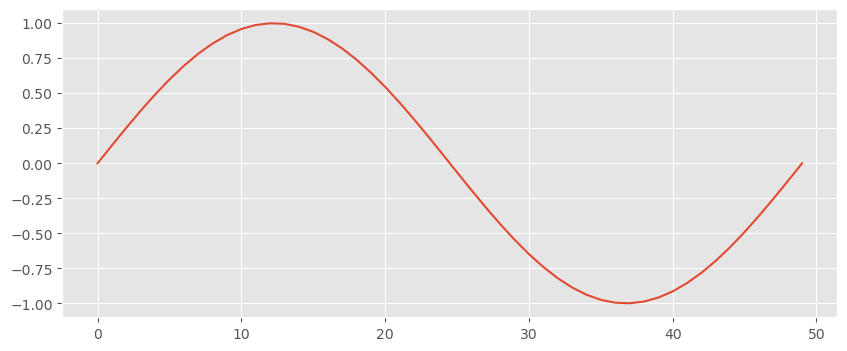

In [8]:
pd.Series(np.sin(np.linspace(0, np.pi * 2, 50))).plot()

You can make multiple cycles by increasing the numbers passed to `np.linspace()` and increase the heights and depths of the peaks and valleys by multiplying the result of `np.sin()`:

<Axes: >

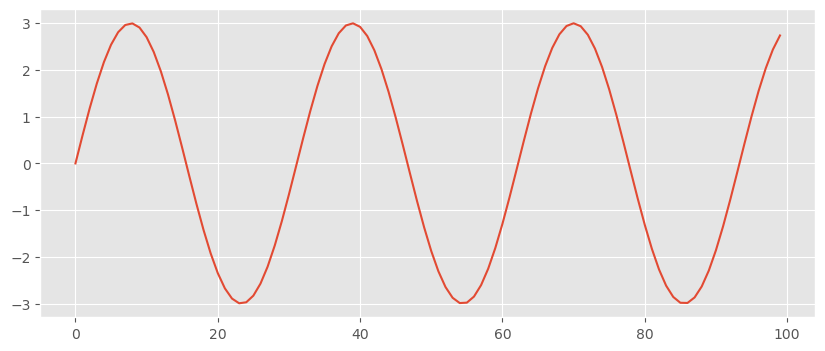

In [9]:
pd.Series(np.sin(np.linspace(0, 20, 100))*3).plot()

Putting this all together: we can create a line that has a repeating wavy pattern with a bit of noise:

<Axes: >

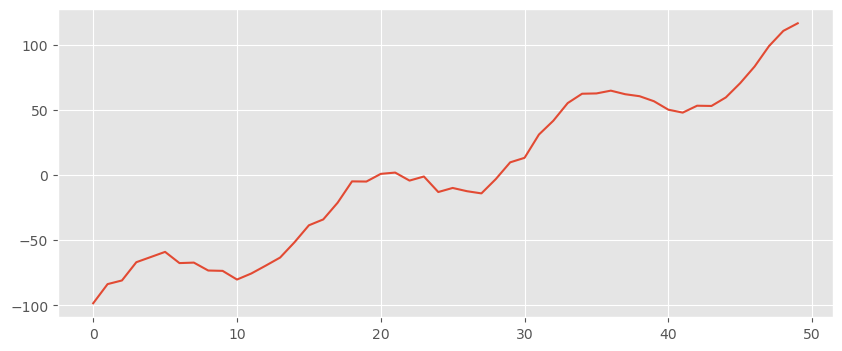

In [10]:
pd.Series(
    np.linspace(-100, 100, 50) + (np.sin(np.linspace(0, 20, 50)) * 20) + np.random.uniform(-5, 5, size=50)
).plot()

## Correlation: a toy scenario

Two variables (i.e., columns in a dataset) are considered to be "correlated" if there is a linear relationship between them. If the value in column `a` of the table tend to be higher as the values in column `b` get higher, then the two columns are correlated. If the values in one column tend to go *lower* as values in the other column go higher, then the values are said to be *negatively correlated* (or inversely correlated).

I'm going to demonstrate some correlations, first with toy data, and then with some actual data.

Here's the toy data. I'm making a data frame with four columns, each of which is populated with synthetic data.

In [11]:
df = pd.DataFrame(
    {
        "widgets": np.linspace(1, 100, 50),
        "florpiness": np.linspace(10, 75, 50) + np.sin(np.linspace(0, 40, 50)) * 5,
        "glormp_count": np.linspace(200, 125, 50) + np.random.uniform(-10, 10, 50),
        "beep_value": np.random.uniform(0, 25, size=50)
    }
)

Here's a little preview of the data frame, showing what the data look like. The `widgets` column increases linearly; the `florpiness` column has a bit of a wavy pattern, but also increases linearly; `glormp_count` is a noisy decreasing line; and `beep_value` is a uniformly distributed random number.

In [12]:
df.head(10)

,widgets,florpiness,glormp_count,beep_value
0,1.000000,10.000000,199.167048,18.176731
1,3.020408,14.969705,189.234256,12.123613
2,5.040816,17.643499,206.130372,23.200101
3,7.061224,17.172343,199.268667,15.652878
4,9.081633,14.689132,198.250686,24.704787
5,11.102041,12.594745,201.238916,1.715750
6,13.122449,13.045028,195.741224,21.765844
7,15.142857,16.592188,195.373523,21.985910
8,17.163265,21.836795,181.600484,14.688121
9,19.183673,26.309697,187.222707,1.218043


If we plot these data as is, we can clearly see the patterns of the synthetic data:

<Axes: >

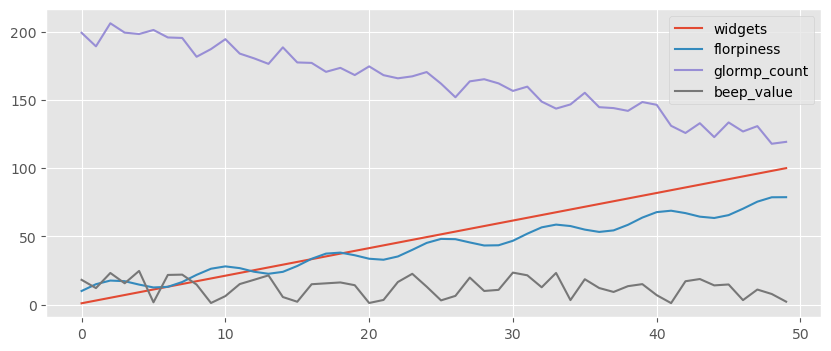

In [13]:
df.plot()

Of course, looking at this graph, it's pretty clear how the data are correlated. But I want to emphasize that correlation has nothing to do with how the individual rows are ordered! To demonstrate, let's put the rows of the data frame in a random order:

In [14]:
df = df.sample(len(df)).reset_index(drop=True)

Now that the rows of synthetic data are randomized, you don't see their original structure, though you can probably guess that the correlations are still there:

<Axes: >

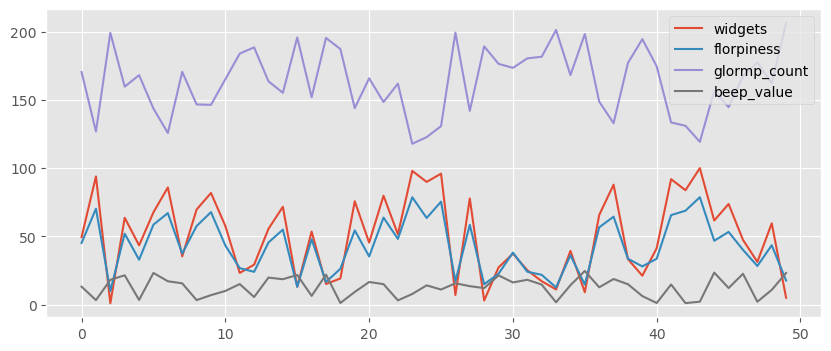

In [15]:
df.plot()

### Intuiting correlation from the scatter plot

An easy way to spot correlations is by doing a scatter plot of two different columns. In a scatter plot, there is one point for every row, and the point is positioned on the X/Y plane according to its value in the two specified columns. For example, let's look at `widgets` vs `flormpiness`:

<Axes: xlabel='widgets', ylabel='florpiness'>

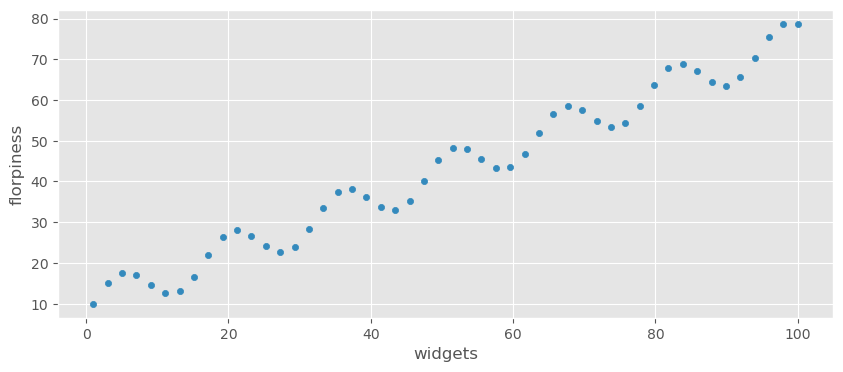

In [16]:
df.plot(kind="scatter", x="widgets", y="florpiness")

If you get a plot that looks somewhat organized around a line that increases from left to right, then the values are probably correlated—like `widgets` and `florpiness` above.

Now let's look at `florpiness` against `glormp_count`:

<Axes: xlabel='florpiness', ylabel='glormp_count'>

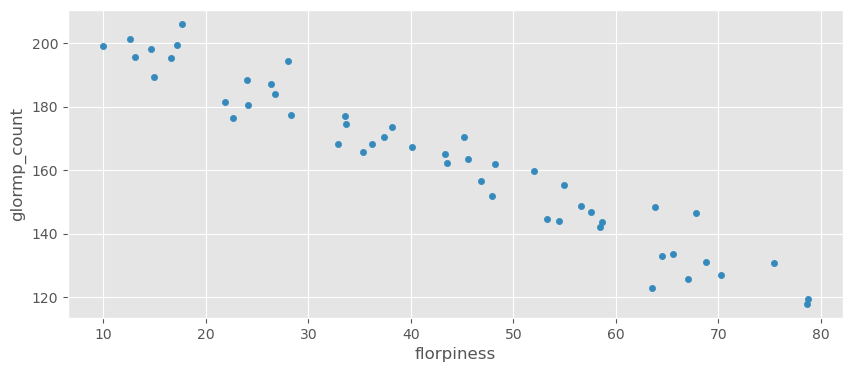

In [17]:
df.plot(kind="scatter", x="florpiness", y="glormp_count")

Here, the points form a descending line, meaning that the two variables are likely negatively correlated (i.e., the higher the `glormp_count`, the lower the `florpiness`).

If we plot any of these values against `beep_value`, however, a different pattern emerges:

<Axes: xlabel='florpiness', ylabel='beep_value'>

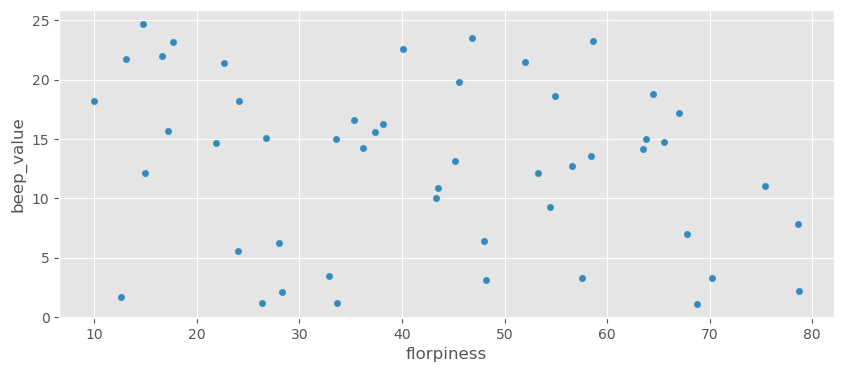

In [18]:
df.plot(kind="scatter", x="florpiness", y="beep_value")

In this plot, there's no clear relationship between the two variables. In the case of our toy data, this is expected, since we created `beep_value` using random numbers from a uniform distribution.

### One scatterplot to rule them all

Pandas provides a function to draw what's called a *scatter matrix*, which is a matrix of scatter plots for every combination of columns in the data frame. Here's what it looks like:

array([[<Axes: xlabel='widgets', ylabel='widgets'>,
        <Axes: xlabel='florpiness', ylabel='widgets'>,
        <Axes: xlabel='glormp_count', ylabel='widgets'>,
        <Axes: xlabel='beep_value', ylabel='widgets'>],
       [<Axes: xlabel='widgets', ylabel='florpiness'>,
        <Axes: xlabel='florpiness', ylabel='florpiness'>,
        <Axes: xlabel='glormp_count', ylabel='florpiness'>,
        <Axes: xlabel='beep_value', ylabel='florpiness'>],
       [<Axes: xlabel='widgets', ylabel='glormp_count'>,
        <Axes: xlabel='florpiness', ylabel='glormp_count'>,
        <Axes: xlabel='glormp_count', ylabel='glormp_count'>,
        <Axes: xlabel='beep_value', ylabel='glormp_count'>],
       [<Axes: xlabel='widgets', ylabel='beep_value'>,
        <Axes: xlabel='florpiness', ylabel='beep_value'>,
        <Axes: xlabel='glormp_count', ylabel='beep_value'>,
        <Axes: xlabel='beep_value', ylabel='beep_value'>]], dtype=object)

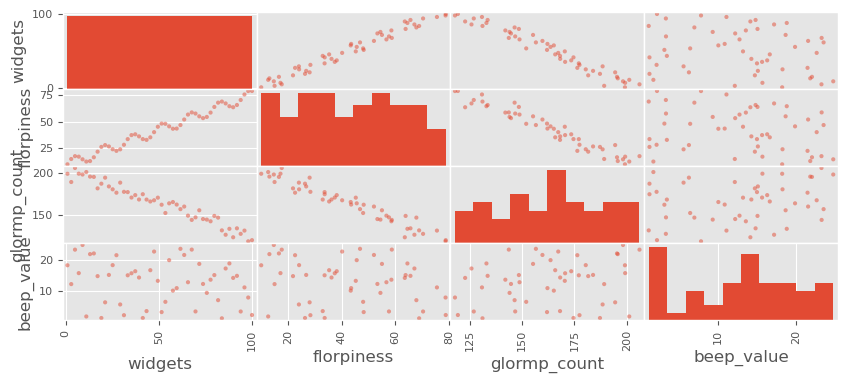

In [19]:
pd.plotting.scatter_matrix(df)

It's a bit messy, but here's how you read it. Both the X axis and the Y axis of the matrix have every column. Each cell has the scatter plot for the two columns that correspond to the cell's X and Y position. It doesn't make sense to do a scatter plot of a column against itself (each column is always perfectly correlated with itself, after all), so Pandas shows the histogram for that column instead.

The scatter matrix is a very easy way to get an overview of your data, and spot columns at a glance that might be correlated in some way.

### Scoring correlations

If just eyeballing the data isn't enough for you, it's also possible to compute a value for the correlation. This is useful for automatically finding correlations, or figuring out which correlations are more pronounced than others. The `.corr()` method of a Pandas `DataFrame` evaluates to a new data frame with a matrix of computed correlations. It looks like this:

In [20]:
df.corr()

,widgets,florpiness,glormp_count,beep_value
widgets,1.000000,0.983441,-0.975385,-0.207085
florpiness,0.983441,1.000000,-0.967650,-0.225806
glormp_count,-0.975385,-0.967650,1.000000,0.209233
beep_value,-0.207085,-0.225806,0.209233,1.000000


The default correlation metric is the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). Using this metric, perfectly correlated columns score 1; perfectly inversely correlated columns score -1; and columns that are not correlated at all score 0. You can find the correlation for two columns at the intersection of the column names in the data frame returned by `.corr()`. Here we can see that there is a strong correlation between, e.g., `widgets` and `florpiness`, whereas `beep_value`'s correlation scores are much closer to zero.

## Correlation: example with real data

Okay, so let's try this out with some actual data. I've prepared [a dataset of GitHub repository topics](github-topics-by-economy.csv), which you should download and put in the same directory as this notebook. I'm going to open it as a data frame first, and then explain what it is and how it works.

In [21]:
# .set_index() below to use the first column as the data frame index (this will be handy later)
df = pd.read_csv("./github-topics-by-economy.csv").set_index("iso2_code")

In [22]:
df

,python,javascript,react,hacktoberfest,typescript,java,nodejs,css,docker,html,...,game,cli,django,mysql,documentation,csharp,kotlin,tailwindcss,ios,blockchain
iso2_code,,,,,,,,,,,,,,,,,,,,,
AR,0.039609,0.065067,0.058653,0.005784,0.022493,0.019765,0.034730,0.034428,0.003161,0.028684,...,0.000000,0.000000,0.000000,0.004302,0.000000,0.000000,0.000000,0.002151,0.000000,0.000000
AT,0.143863,0.096892,0.016085,0.103127,0.056965,0.090896,0.000000,0.000000,0.021177,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004854,0.000000,0.000000,0.000000,0.000000,0.000000
AU,0.065165,0.051515,0.053479,0.038584,0.039427,0.024723,0.030011,0.016591,0.025528,0.016792,...,0.008726,0.008860,0.000000,0.000000,0.007203,0.000000,0.000000,0.001015,0.000000,0.000996
BD,0.024566,0.046559,0.035475,0.001271,0.008511,0.013066,0.024214,0.029801,0.000000,0.027155,...,0.000000,0.000000,0.006169,0.002461,0.000000,0.000000,0.000000,0.013514,0.000000,0.000000
BE,0.134137,0.076613,0.045815,0.076655,0.033513,0.038603,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.009121,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US,0.028277,0.020119,0.017519,0.014956,0.010669,0.011038,0.010387,0.007184,0.008272,0.006825,...,0.004380,0.004345,0.002667,0.002495,0.003928,0.003589,0.001787,0.001829,0.003357,0.002935
UZ,0.000000,0.015633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
VE,0.000000,0.036792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


This data is derived from the [GitHub Innovation Graph](https://github.com/github/innovationgraph/), which tracks public activity on GitHub. If you're not familiar, GitHub is a Microsoft-owned company that provides web hosting for source code. The main organizational unit of source code on GitHub is a "repository," which generally holds the source code for a single project. Repositories are associated with "topics," which are keywords that users assign to the repositories based on their contents. Users can also take actions on repositories (such as adding or editing code), and GitHub associates those actions with the user's IP address, which is then associated with a particular country (or "economy").

The Innovation Graph database provides information about how many users from each country took actions on repositories, and breaks that down into a number of different categories. The data we're using here is derived from data on contributions to topics. Each column in our data frame represents a topic, and each row represents an "economy." Each cell is a metric that reflects the total percentage of contributions made to repositories labelled with the topic in the column from the country in the row. For example:

In [23]:
df.loc["US"]["python"]

0.0282770772955455

... gives us the percentage of contributions originating in the United States to repositories labelled "python."

You can see how I prepared the data in [this notebook](github-topics-initial-work.ipynb). Note that I've only included the top 40 most popular topics, and also excluded some outliers (the `config` and `github-config` topics), so the values for each row don't perfectly add up to 1.

### Correlating repository topics

Columns in this data frame will be correlated if they tend to be found in similar proportions, regardless of economy. Drawing a scatter matrix of the entire data frame would take a long time and would be pretty overwhelming to read, so let's try drawing a little subset. The following grabs a little "slice" of the data frame including only the specified columns:

In [24]:
df_slice = df[["python", "php", "java", "javascript", "css", "blockchain"]]

In [25]:
df_slice

,python,php,java,javascript,css,blockchain
iso2_code,,,,,,
AR,0.039609,0.000000,0.019765,0.065067,0.034428,0.000000
AT,0.143863,0.000000,0.090896,0.096892,0.000000,0.000000
AU,0.065165,0.015786,0.024723,0.051515,0.016591,0.000996
BD,0.024566,0.015008,0.013066,0.046559,0.029801,0.000000
BE,0.134137,0.032580,0.038603,0.076613,0.000000,0.000000
...,...,...,...,...,...,...
US,0.028277,0.003501,0.011038,0.020119,0.007184,0.002935
UZ,0.000000,0.000000,0.000000,0.015633,0.000000,0.000000
VE,0.000000,0.000000,0.000000,0.036792,0.000000,0.000000


And here's the scatter matrix:

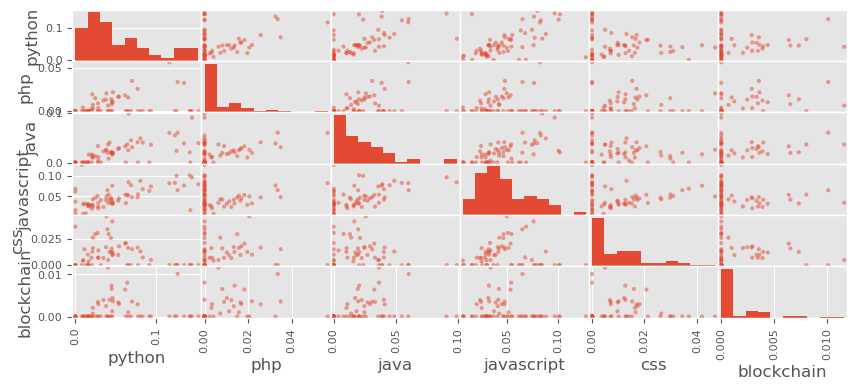

In [26]:
# using "plot =" here to suppress the display of the value, which is long and weird for scatter_matrix
plot = pd.plotting.scatter_matrix(df_slice)

Again, each dot in a scatter plot represents a row in the database—in our case, one economy. If we find that two topics are correlated, it means that if one topic is popular in a given economy, the other is popular as well.

A quick eyeball of this data shows that the `python` topic is probably correlated fairly strongly with `php`, `java` and `javascript`, but not strongly correlated with `css` or `blockchain`. The `css` topic seems to be correlated with `javascript`, but doesn't have other strong correlations. We can put our eyeballs to the test with a quick call to `.corr()`:

In [27]:
df_slice.corr()

,python,php,java,javascript,css,blockchain
python,1.000000,0.267850,0.612837,0.585947,-0.246902,0.070675
php,0.267850,1.000000,0.346770,0.050148,0.095875,0.344741
java,0.612837,0.346770,1.000000,0.523005,-0.114569,0.273783
javascript,0.585947,0.050148,0.523005,1.000000,-0.014515,-0.142675
css,-0.246902,0.095875,-0.114569,-0.014515,1.000000,-0.015614
blockchain,0.070675,0.344741,0.273783,-0.142675,-0.015614,1.000000


... which bears out our observations. (Though in fact `css` has a negative correlation with `python`, and somehow `php` is the most highly correlated topic with `blockchain` in this sample of columns!)

### Sorting through correlations

Looking at the raw correlation matrix for a data frame this size is going to be pretty daunting, and it might be difficult to spot interesting patterns. Another way of poking through the correlations is on a column-by-column basis. Let's look at just the correlation scores for the `python` column, sorted in descending order:

In [28]:
df.corr()["python"].sort_values(ascending=False)

python              1.000000
hacktoberfest       0.733542
java                0.612837
javascript          0.585947
typescript          0.461957
docker              0.392906
react               0.366915
php                 0.267850
documentation       0.212785
machine-learning    0.200749
linux               0.182088
kubernetes          0.163709
nodejs              0.143030
rust                0.122608
golang              0.104656
deep-learning       0.096169
api                 0.081185
blockchain          0.070675
go                  0.058190
dotfiles            0.057860
cli                 0.012881
game               -0.007755
vue                -0.012221
cpp                -0.019139
blog               -0.030812
python3            -0.039061
website            -0.040422
csharp             -0.059876
android            -0.088875
ios                -0.098411
kotlin             -0.107205
django             -0.108539
mysql              -0.146326
mongodb            -0.172419
nextjs        

This tells us some potentially interesting things, e.g., that if people are programming in Python in your country, they're probably also programming in Java and JavaScript—but *not* in ReactJS.

The same for the `blockchain` topic:

In [29]:
df.corr()["blockchain"].sort_values(ascending=False)

blockchain          1.000000
deep-learning       0.825812
machine-learning    0.771085
cpp                 0.674569
ios                 0.632550
android             0.623655
linux               0.588501
python3             0.586005
rust                0.582939
go                  0.581567
golang              0.551641
docker              0.546328
vue                 0.544050
kotlin              0.525407
blog                0.511948
mysql               0.500201
game                0.480335
api                 0.478675
cli                 0.465597
documentation       0.455352
kubernetes          0.390907
csharp              0.372484
php                 0.344741
website             0.326996
django              0.304351
nodejs              0.297573
java                0.273783
nextjs              0.269549
typescript          0.267711
mongodb             0.256912
dotfiles            0.228191
python              0.070675
tailwindcss         0.051642
html                0.040865
reactjs       

Blockchain and deep learning are very strongly correlated (cough chasing trends cough).

Here's another example, showing all of the pairs of topics with very small correlation scores:

In [30]:
# using some tricks from https://stackoverflow.com/a/65439244
df2 = (df.corr().abs() < 0.005).unstack().reset_index()
df2[df2[0]][["level_0", "level_1"]]

,level_0,level_1
150,hacktoberfest,game
169,typescript,html
224,java,nextjs
292,css,machine-learning
299,css,kubernetes
301,css,rust
330,docker,reactjs
364,html,typescript
377,html,vue
382,html,deep-learning


### Correlating the transpose

A data frame's *transpose* is a copy of that data frame where the rows and columns have swapped places. With the data frame we're working with here, the transpose will have the economies as columns, and the topics as rows. To get the transpose, use the `.T` attribute of the `DataFrame` object, like so:

In [31]:
df.T.head(12)

iso2_code,AR,AT,AU,BD,BE,BG,BR,BY,CA,CH,...,SG,TH,TR,TW,UA,US,UZ,VE,VN,ZA
python,0.039609,0.143863,0.065165,0.024566,0.134137,0.007872,0.021625,0.000000,0.044755,0.126227,...,0.063989,0.012849,0.037755,0.091298,0.038350,0.028277,0.000000,0.000000,0.019918,0.016711
javascript,0.065067,0.096892,0.051515,0.046559,0.076613,0.127643,0.042422,0.061616,0.042014,0.065189,...,0.054047,0.007482,0.040929,0.063431,0.049700,0.020119,0.015633,0.036792,0.028190,0.025470
react,0.058653,0.016085,0.053479,0.035475,0.045815,0.055487,0.028838,0.152583,0.042520,0.048259,...,0.047007,0.023123,0.036754,0.069960,0.058654,0.017519,0.000000,0.000000,0.028847,0.015814
hacktoberfest,0.005784,0.103127,0.038584,0.001271,0.076655,0.000000,0.013039,0.000000,0.024782,0.060714,...,0.046772,0.021334,0.005206,0.000000,0.013599,0.014956,0.000000,0.000000,0.004431,0.000000
typescript,0.022493,0.056965,0.039427,0.008511,0.033513,0.062741,0.026432,0.044069,0.024672,0.051805,...,0.038172,0.008376,0.020046,0.036175,0.035039,0.010669,0.000000,0.000000,0.016845,0.000000
java,0.019765,0.090896,0.024723,0.013066,0.038603,0.000000,0.013997,0.000000,0.019468,0.060324,...,0.036430,0.000000,0.024695,0.000000,0.025875,0.011038,0.000000,0.000000,0.016199,0.000000
nodejs,0.034730,0.000000,0.030011,0.024214,0.000000,0.000000,0.024740,0.000000,0.023837,0.029838,...,0.028321,0.003741,0.022382,0.040398,0.027843,0.010387,0.000000,0.000000,0.025307,0.000000
css,0.034428,0.000000,0.016591,0.029801,0.000000,0.000000,0.026389,0.000000,0.015945,0.000000,...,0.000000,0.000000,0.017302,0.000000,0.046888,0.007184,0.000000,0.000000,0.007092,0.000000
docker,0.003161,0.021177,0.025528,0.000000,0.000000,0.000000,0.010259,0.000000,0.014581,0.056043,...,0.009851,0.000000,0.007705,0.019060,0.021877,0.008272,0.000000,0.000000,0.004442,0.000000
html,0.028684,0.000000,0.016792,0.027155,0.000000,0.000000,0.025875,0.000000,0.014659,0.000000,...,0.000000,0.000000,0.015225,0.000000,0.046940,0.006825,0.000000,0.000000,0.005333,0.000000


The beauty of the transpose is that now we can do all of the same correlations that we did with topics above, but now with economies. Here's the correlation score matrix:

In [32]:
df.T.corr()

iso2_code,AR,AT,AU,BD,BE,BG,BR,BY,CA,CH,...,SG,TH,TR,TW,UA,US,UZ,VE,VN,ZA
iso2_code,,,,,,,,,,,,,,,,,,,,,
AR,1.000000,0.524220,0.779648,0.907110,0.590837,0.711644,0.948850,0.671156,0.862375,0.536234,...,0.674736,0.589135,0.880958,0.729375,0.864828,0.734447,0.543278,0.543278,0.898248,0.786915
AT,0.524220,1.000000,0.779421,0.355682,0.930824,0.461678,0.524470,0.211480,0.762752,0.871771,...,0.848906,0.629587,0.616665,0.598454,0.485520,0.842247,0.395217,0.395217,0.541174,0.614647
AU,0.779648,0.779421,1.000000,0.593629,0.833766,0.603541,0.770416,0.566796,0.957181,0.860706,...,0.872875,0.772289,0.804193,0.798211,0.759000,0.934125,0.376539,0.376539,0.775018,0.728705
BD,0.907110,0.355682,0.593629,1.000000,0.449863,0.573053,0.886824,0.509452,0.671094,0.350983,...,0.444079,0.388986,0.803387,0.525120,0.768483,0.531746,0.503584,0.503584,0.804208,0.656676
BE,0.590837,0.930824,0.833766,0.449863,1.000000,0.490000,0.543840,0.356085,0.827748,0.878067,...,0.849764,0.740537,0.679141,0.713345,0.544739,0.886672,0.378850,0.378850,0.573887,0.737894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US,0.734447,0.842247,0.934125,0.531746,0.886672,0.550268,0.674171,0.476610,0.958069,0.904895,...,0.920982,0.739113,0.779027,0.815323,0.677021,1.000000,0.403460,0.403460,0.701750,0.783723
UZ,0.543278,0.395217,0.376539,0.503584,0.378850,0.832768,0.537041,0.337764,0.461898,0.283222,...,0.399336,0.164360,0.468109,0.396831,0.358103,0.403460,1.000000,1.000000,0.427096,0.735476
VE,0.543278,0.395217,0.376539,0.503584,0.378850,0.832768,0.537041,0.337764,0.461898,0.283222,...,0.399336,0.164360,0.468109,0.396831,0.358103,0.403460,1.000000,1.000000,0.427096,0.735476


And a little subset of economies and their correlations, visualized:

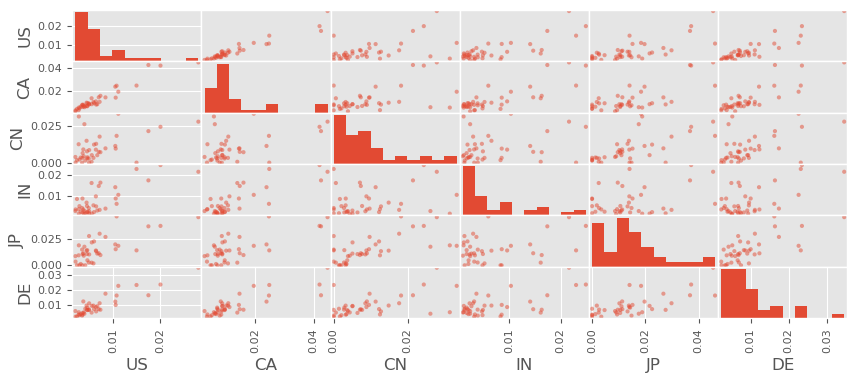

In [33]:
plot = pd.plotting.scatter_matrix(df.T[["US", "CA", "CN", "IN", "JP", "DE"]])

You can see that the US and Canada are very strongly correlated in their topic choices, but China and Germany are hardly correlated at all.

The top five economies most like the US in their topic choices:

In [34]:
df.T.corr()["US"].sort_values(ascending=False).head(5)

iso2_code
US    1.000000
GB    0.986076
CA    0.958069
EU    0.953918
ES    0.935035
Name: US, dtype: float64

Versus the top five most like China:

In [35]:
df.T.corr()["CN"].sort_values(ascending=False).head(5)

iso2_code
CN    1.000000
HK    0.930800
KR    0.718723
TW    0.660345
JP    0.643677
Name: CN, dtype: float64

[This is a good source for looking up ISO country codes](https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/slim-2/slim-2.csv), in case you're wondering what the codes stand for.

### What do you mean "linear"?

The Pearson correlation coefficient (i.e., the metric that `.corr()` uses) only works for *linear* relationships. Linear in this case means a relationship that can be described by the formula for a line: $y = mx + b$ (where $m$ and $b$ are constants). We saw this in the examples above, where the scatter plots of highly correlated columns look more or less like diagonal lines.

Pearson correlation won't necessarily pick up on *non-linear* relationships—i.e., relationships that can't be modeled using a line. "Non-linear" in this case means mathematical formula that produce graphs that have curves in them—say, a parabola, or the result of a trigonometric function. For example, let's say that we have two columns that are both the result of the $sin$ function:

In [36]:
alpha = np.sin(np.linspace(0, 50, 100)) * 20
beta = np.cos(np.linspace(0, 50, 100)) * 10

<Axes: >

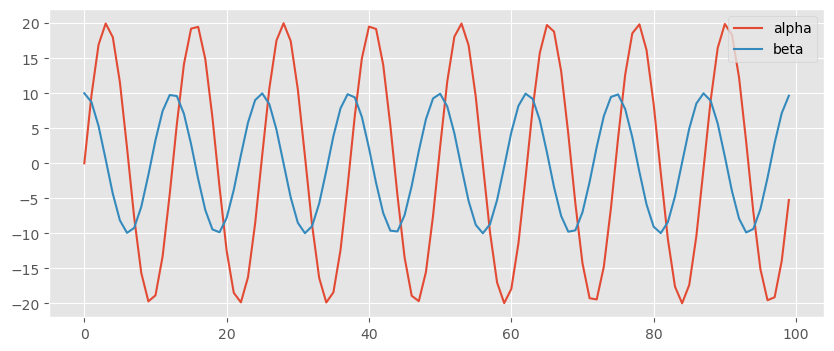

In [37]:
df_parabola = pd.DataFrame({"alpha": alpha, "beta": beta})
df_parabola.plot()

Looking at this graph, we can see that the two columns are clearly "correlated" in some sense: as `alpha` grows bigger, `beta` grows bigger; as `alpha` gets smaller, `beta` gets smaller. (The cycles are different amplitudes and a bit out of phase, but the point still stands.) Drawing a scatter plot of these two columns yields a visible pattern—an ellipse!

<Axes: xlabel='alpha', ylabel='beta'>

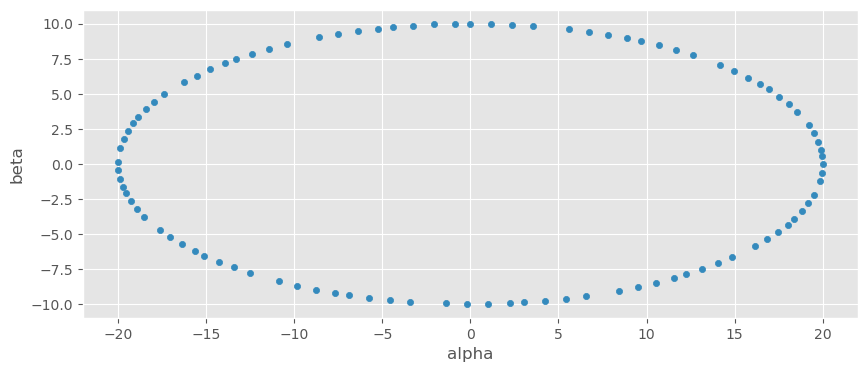

In [38]:
df_parabola.plot.scatter(x="alpha", y="beta")

But an ellipse is not a line! Consequently, the Pearson correlation coefficient doesn't pick up on the pattern, and tells us that the columns are not correlated:

In [39]:
df_parabola.corr()

,alpha,beta
alpha,1.000000,-0.001281
beta,-0.001281,1.000000


Non-linear correlation is a trickier topic, and generally involves bringing a bit of domain knowledge into your decision-making. [A good outline of methods available to you](https://www.mssqltips.com/sqlservertip/7652/non-linear-relationship-analysis-with-python/).

## Clustering

Finding correlations between columns can be a helpful starting point for investigating your data. But it would also be helpful to have a "big picture" of how individual *rows* are similar to other rows, or differ, based on the values in their columns. There are a couple of ways to get a big picture like this.

### Dimensional reduction and visualization with t-SNE

A quick trick that a lot of people use to find relationships among rows in their data is visualization with [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) ("t-distributed stochastic neighbor embedding"). T-SNE is a powerful dimensional reduction technique that is able to "compress" the numerical values stored in many columns down to a fewer number of columns—usually two or three). Once we have two columns, we can treat those columns as X and Y coordinates in a scatter plot. The proximity of points corresponding to rows (more or less) reflects the similarity of the data contained in those rows. Looking at the overall plot can give you a sense of how your data is organized—if there are any interesting clumps, or any outliers.

> Note: It's called "dimensionality reduction" because fancy math people refer to columns in their spreadsheets as "dimensions." Dimensionality reduction is pretty cool and I like it a lot and it comes in handy all the time. t-SNE is just one of many dimensionality reduction techniques—it's great for visualization, but might not be perfect for other uses. Other techniques you'll find commonly in use include [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) and [UMAP](https://umap-learn.readthedocs.io/en/latest/). Explaining how these techniques work is beyond the scope of this tutorial, but you should try 'em out.

So let's give it a shot. First, I'm going to be a bit more specific about the data we're using. The following cell creates two different variables—one for the original data frame where the rows are economies, and the other for the transpose where the rows are topics. Remember that dimensionality reduction operates rows, and in the examples below we'll be visualizing the relationship between those rows. (This is different from correlation above, where we were trying to find relationships among columns.)

In [40]:
df_topics = df.T
df_econ = df

Now we'll import the `TSNE` implementation in [scikit-learn](https://scikit-learn.org/stable/), which is a handy library for machine learning and other fun data stuff that comes with the default Anaconda installation.

In [41]:
from sklearn.manifold import TSNE

The following cell creates a t-SNE analysis object, "fits" and "transforms" the data from the given data frame, and evaluates to a numpy array of the calculated t-SNE values. The `n_components` parameter sets the number of columns we want to end up with. (I don't know why math people can't decide what to call columns in their spreadsheets—"dimensions," "variables," "components," "features," just pick one y'all.) In this case I'm picking two because we want to draw a two-dimensional scatter plot. (You can't easily do this with Pandas, but you could set this parameter to 3 if you wanted to do a 3-dimensional plot.)

In [42]:
tsne = TSNE(n_components=2, n_iter=3000).fit_transform(df_topics)

The array that gets returned from this function is a little bit unfriendly:

In [43]:
tsne[:10] # just show the first ten rows, for the sake of brevity

array([[5.157016  , 1.6499438 ],
       [5.106988  , 1.6308453 ],
       [5.0892572 , 1.5853395 ],
       [5.397877  , 1.3409379 ],
       [5.2726393 , 1.1794107 ],
       [5.3718805 , 1.2036223 ],
       [4.7158203 , 0.80081576],
       [4.044028  , 0.2949238 ],
       [5.382237  , 0.49136925],
       [4.1278696 , 0.2055611 ]], dtype=float32)

The trick is that each row in the array corresponds to the row at the same numerical index in the original data frame. This is a little bit easier to understand if we turn this array back into a data frame, using the row indexes from the original data frame. I'm also setting the column names to `x` and `y`, as a mnemonic for what we intend to do with them.

In [44]:
tsne_df = pd.DataFrame(tsne, index=df_topics.index, columns=["x", "y"])

In [45]:
tsne_df.head(10)

,x,y
python,5.157016,1.649944
javascript,5.106988,1.630845
react,5.089257,1.585340
hacktoberfest,5.397877,1.340938
typescript,5.272639,1.179411
java,5.371881,1.203622
nodejs,4.715820,0.800816
css,4.044028,0.294924
docker,5.382237,0.491369
html,4.127870,0.205561


And now, the stunning results! Here's a scatterplot of the t-SNE.

<Axes: xlabel='x', ylabel='y'>

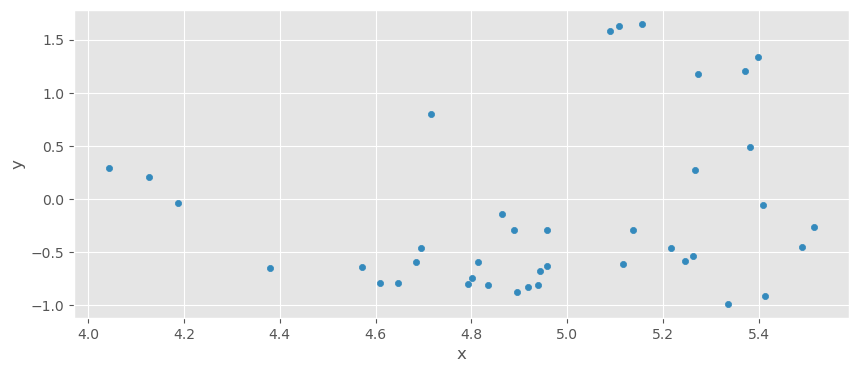

In [46]:
tsne_df.plot.scatter(x="x", y="y")

Well... maybe not *stunning*. Actually, it is pretty much impossible to interpret. But we can at least make out some little clumps and clusters that might bear further scrutiny.

The code in the following cell adds labels to each point (corresponding to the data frame row index), which makes it a bit easier to read:

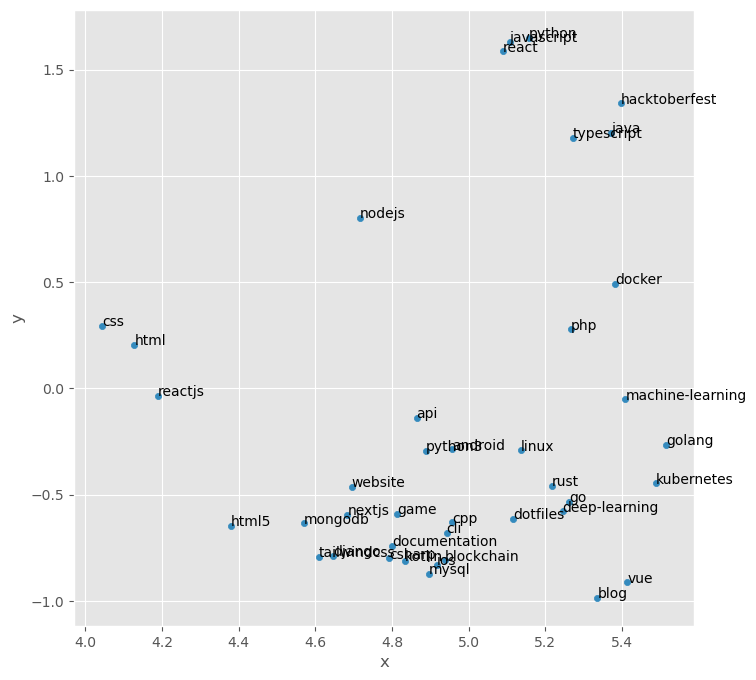

In [47]:
fig, ax = plt.subplots() # create a matplotlib axis
tsne_df.plot.scatter(0, 1, ax=ax, figsize=(8, 8)) # figsize sets the size of the figure
for k, v in tsne_df.iterrows(): # annotate with matplotlib for every row
    ax.annotate(k, v)

Same thing for economies, gathered in one cell:

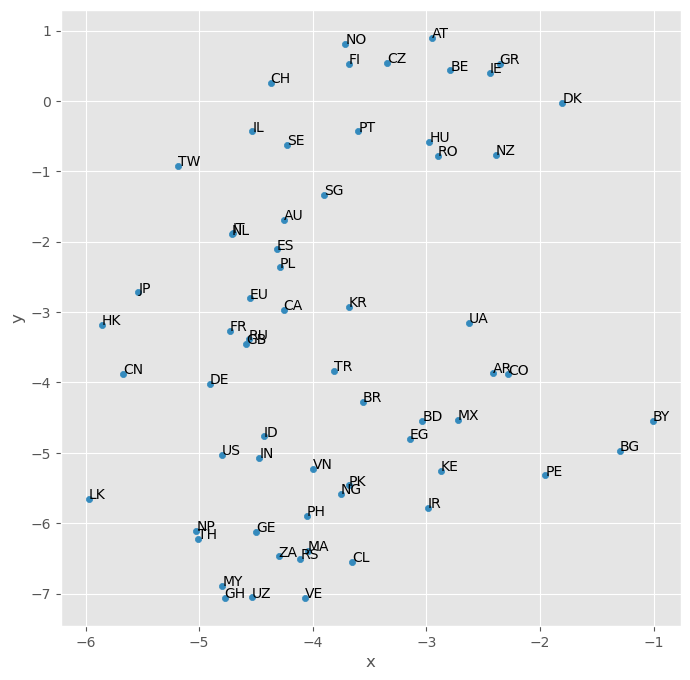

In [48]:
tsne = TSNE(n_components=2, n_iter=3000).fit_transform(df_econ)
tsne_df = pd.DataFrame(tsne, index=df_econ.index, columns=["x", "y"])
fig, ax = plt.subplots() # create a matplotlib axis
tsne_df.plot.scatter(0, 1, ax=ax, figsize=(8, 8)) # figsize sets the size of the figure
for k, v in tsne_df.iterrows(): # annotate with matplotlib for every row
    ax.annotate(k, v)

You might be asking, "Allison. What do these dimensions mean? What does it mean for New Zealand to be at (-2.3, -1.1) or whatever?" It means nothing! As I mentioned above, you can think of t-SNE as a way of "compressing" the values of the columns in your data to a smaller number of columns. In the compression process, we lose any clear relationship between any individual data column and the resulting dimensions. The numbers aren't important—what's important is the distance between the points and their relative positioning.

### K-means clustering

Being able to visually spot clusters is nice, but having the computer identify the clusters—and tell us which rows belong to which cluster—is even better. This is "[cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis)" and there are [many ways to do it](https://scikit-learn.org/stable/modules/clustering.html). We're going to use an algorithm called "[K-means](https://scikit-learn.org/stable/modules/clustering.html#k-means)" which is a good general purpose clustering algorithm to start with for most kinds of data.

To use K-Means, we'll import it from scikit-learn:

In [49]:
from sklearn.cluster import KMeans # use MiniBatchKMeans if you have a lot of data
from sklearn.preprocessing import Normalizer

We're also importing [the `Normalizer` class](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) and using it to scale the values in each row to a unit vector—essentially, make it so the values of every row add up to exactly 1. Many machine learning and clustering algorithms (like K-means) work better if this kind of normalization is performed first.

In [50]:
X = Normalizer().fit_transform(df_topics)

Next, we do the clustering! Although the K-means algorithm will identify the clusters, we need to tell it how many clusters to look for. For the purposes of exploratory data analysis, you can just kind of fiddle with the value (ahem "empirically determine" the value) until you get results that help you make sense of the data.

In [51]:
cluster_count = 10
clusters = KMeans(n_clusters=cluster_count, n_init="auto").fit_predict(X)

The resulting value from the K-Means fit/transform process is an array that looks like this:

In [52]:
clusters

array([0, 7, 7, 0, 7, 0, 7, 2, 4, 2, 2, 5, 3, 4, 5, 1, 5, 3, 4, 8, 4, 4,
       3, 3, 5, 1, 2, 4, 1, 6, 9, 9, 5, 1, 9, 9, 1, 6, 1, 3], dtype=int32)

... which just looks like a bunch of random digits. But there is a method here! Each of these digits corresponds to the cluster to which the element in the original data frame was assigned, by numerical index. This means that `clusters[0]` tells us the cluster of the first row of the data frame; `clusters[1]` gives us the cluster of the second row, and so forth. The code in the following cell makes this a bit easier to read, by making a dictionary whose keys are the cluster number and whose values are the indices that belong to that cluster:

In [53]:
from collections import defaultdict
group_by_cluster = defaultdict(list)
for i, item in enumerate(clusters):
    group_by_cluster[item].append(df_topics.index[i])

In [54]:
group_by_cluster

defaultdict(list,
            {0: ['python', 'hacktoberfest', 'java'],
             7: ['javascript', 'react', 'typescript', 'nodejs'],
             2: ['css', 'html', 'reactjs', 'html5'],
             4: ['docker', 'golang', 'linux', 'go', 'rust', 'dotfiles'],
             5: ['php', 'api', 'python3', 'nextjs', 'django'],
             3: ['machine-learning',
              'vue',
              'deep-learning',
              'blog',
              'blockchain'],
             1: ['android', 'website', 'cpp', 'mysql', 'kotlin', 'ios'],
             8: ['kubernetes'],
             6: ['mongodb', 'tailwindcss'],
             9: ['game', 'cli', 'documentation', 'csharp']})

This gives us an idea of what rows might be related to each other at a higher level, and invites further investigation about why particular rows might be clustering together.

Here's the same example but with the economy data, all in one cell:

In [55]:
X = Normalizer().fit_transform(df_econ)
cluster_count = 8
clusters = KMeans(n_clusters=cluster_count, n_init="auto").fit_predict(X)
group_by_cluster = defaultdict(list)
for i, item in enumerate(clusters):
    group_by_cluster[item].append(df_econ.index[i])
group_by_cluster

defaultdict(list,
            {1: ['AR',
              'BD',
              'BR',
              'CO',
              'EG',
              'KE',
              'MX',
              'NG',
              'PH',
              'PK',
              'UA',
              'VN'],
             7: ['AT', 'HU'],
             0: ['AU',
              'CA',
              'CH',
              'CN',
              'DE',
              'ES',
              'EU',
              'FR',
              'GB',
              'HK',
              'ID',
              'IN',
              'IT',
              'JP',
              'KR',
              'NL',
              'PL',
              'RU',
              'TR',
              'US'],
             2: ['BE', 'CL', 'DK', 'GR', 'IE', 'IR'],
             3: ['BG', 'BY', 'GH', 'MA', 'PE', 'RS', 'UZ', 'VE', 'ZA'],
             4: ['CZ', 'FI', 'GE', 'IL', 'NO', 'PT', 'RO', 'SE', 'SG', 'TW'],
             6: ['LK', 'NP', 'NZ', 'TH'],
             5: ['MY']})

## Correlating and clustering categorical data

TK but here's some stuff!

In [56]:
df = pd.read_csv('./2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20231103.csv')

In [57]:
df.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')

In [58]:
df = df[["Unique Squirrel ID", "Age", "Primary Fur Color", "Location", "Running", "Chasing", "Climbing", "Eating", "Foraging", "Kuks", "Quaas", "Moans"]]

In [59]:
df = df.dropna().set_index("Unique Squirrel ID")

In [60]:
df

,Age,Primary Fur Color,Location,Running,Chasing,Climbing,Eating,Foraging,Kuks,Quaas,Moans
Unique Squirrel ID,,,,,,,,,,,
13E-AM-1017-05,Adult,Gray,Above Ground,False,False,False,False,True,False,False,False
36H-AM-1010-02,Adult,Gray,Ground Plane,False,False,False,False,True,False,False,False
33F-AM-1008-02,Adult,Gray,Ground Plane,False,False,False,False,True,False,False,False
21C-PM-1006-01,Adult,Gray,Ground Plane,False,False,False,False,False,False,False,False
11D-AM-1010-03,Adult,Gray,Above Ground,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
21F-PM-1018-02,Juvenile,Cinnamon,Ground Plane,False,False,False,False,True,False,False,False
30B-AM-1007-04,Adult,Gray,Ground Plane,False,False,False,True,True,False,False,False
19A-PM-1013-05,Adult,Gray,Ground Plane,False,False,False,False,True,False,False,False


In [61]:
df_one_hot = pd.get_dummies(df)

In [62]:
df_one_hot

,Running,Chasing,Climbing,Eating,Foraging,Kuks,Quaas,Moans,Age_?,Age_Adult,Age_Juvenile,Primary Fur Color_Black,Primary Fur Color_Cinnamon,Primary Fur Color_Gray,Location_Above Ground,Location_Ground Plane
Unique Squirrel ID,,,,,,,,,,,,,,,,
13E-AM-1017-05,False,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False
36H-AM-1010-02,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True
33F-AM-1008-02,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True
21C-PM-1006-01,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True
11D-AM-1010-03,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21F-PM-1018-02,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True
30B-AM-1007-04,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,True
19A-PM-1013-05,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True


In [64]:
df_one_hot.corr()["Running"].sort_values(ascending=False)

Running                       1.000000
Location_Ground Plane         0.069902
Chasing                       0.026507
Primary Fur Color_Cinnamon    0.021864
Age_?                         0.015545
Kuks                          0.004408
Primary Fur Color_Black       0.000943
Age_Juvenile                 -0.000187
Age_Adult                    -0.001116
Quaas                        -0.006003
Moans                        -0.010805
Primary Fur Color_Gray       -0.020301
Climbing                     -0.067014
Location_Above Ground        -0.069902
Eating                       -0.138519
Foraging                     -0.228328
Name: Running, dtype: float64

<Axes: xlabel='x', ylabel='y'>

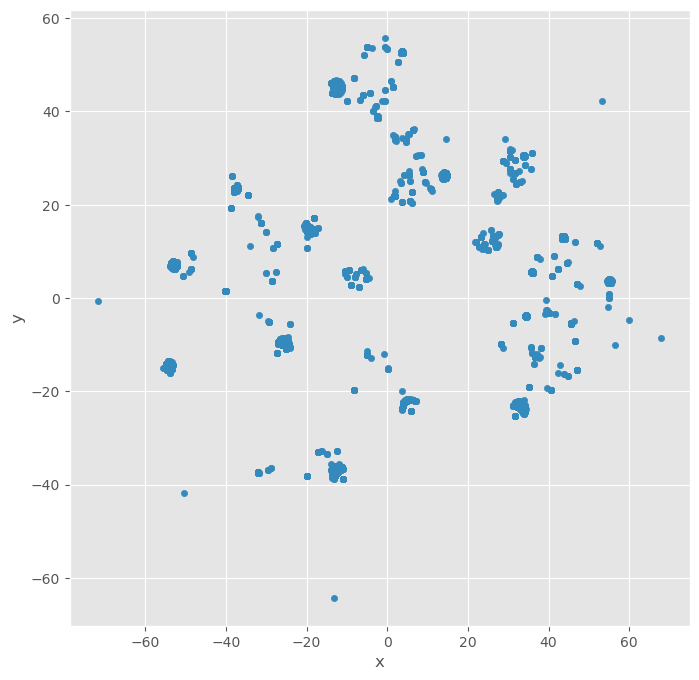

In [65]:
tsne = TSNE(n_components=2).fit_transform(df_one_hot)
tsne_df = pd.DataFrame(tsne, index=df_one_hot.index, columns=["x", "y"])
fig, ax = plt.subplots() # create a matplotlib axis
tsne_df.plot.scatter(0, 1, ax=ax, figsize=(8, 8)) # figsize sets the size of the figure
#for k, v in tsne_df.iterrows(): # annotate with matplotlib for every row
#    ax.annotate(k, v)

In [66]:
X = Normalizer().fit_transform(df_one_hot)
cluster_count = 8
clusters = KMeans(n_clusters=cluster_count, n_init="auto").fit_predict(X)
group_by_cluster = defaultdict(list)
for i, item in enumerate(clusters):
    group_by_cluster[item].append(df_one_hot.index[i])
for k, v in group_by_cluster.items():
    print("cluster:", k)
    print("some squirrels:")
    for idx in v[:3]:
        print(df_one_hot.loc[idx])
    print()

cluster: 2
some squirrels:
Running                       False
Chasing                       False
Climbing                      False
Eating                        False
Foraging                       True
Kuks                          False
Quaas                         False
Moans                         False
Age_?                         False
Age_Adult                      True
Age_Juvenile                  False
Primary Fur Color_Black       False
Primary Fur Color_Cinnamon    False
Primary Fur Color_Gray         True
Location_Above Ground          True
Location_Ground Plane         False
Name: 13E-AM-1017-05, dtype: bool
Running                       False
Chasing                       False
Climbing                       True
Eating                        False
Foraging                      False
Kuks                          False
Quaas                         False
Moans                         False
Age_?                         False
Age_Adult                      True
Age